<a href="https://colab.research.google.com/github/teddcp/Machine-Learning-/blob/master/Assignment_3B_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP
---------------------------------------------------------------------

1. Write a python script that reads the data_in.csv from every cell in column labeled as comment and perform sentence tokenization and redirects in to column of data_out.csv. Perform the NE Chunking on these sentences. 

2. Write a python script that reads the data_in.csv from every cell in column labeled as comment and perform word tokenization and redirects in to column of data_out.csv 

3. From an input file data.txt it is required to identify the POS-Tagging and display it on tree structure. 

4. For a given text file exclude the stop words and perform the Stemming & lemmatization and compare the results. 

5. Create a small dictionary file with required set of words with weightage attached to it with positive and negative numbers. Create a python script that analyzes the given text file and classify it as negative or positive sentiment. 
 

## Q1
--------------------------------------------------------------------------------

In [0]:
import os
import matplotlib as mpl
if os.environ.get('DISPLAY','') == '':
    print('no display found. Using non-interactive Agg backend')
    mpl.use('Agg')
import matplotlib.pyplot as plt

no display found. Using non-interactive Agg backend


In [0]:
!pip install nltk

  Running setup.py install for nltk: started
    Running setup.py install for nltk: finished with status 'done'


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [0]:
import pandas as pd
import numpy as np
import nltk

In [0]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\debasis
[nltk_data]    |     panda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to C:\Users\debasis
[nltk_data]    |     panda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to C:\Users\debasis
[nltk_data]    |     panda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to C:\Users\debasis
[nltk_data]    |     panda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to C:\Users\debasis
[nltk_data]    |     panda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading

True

In [0]:
data=pd.read_excel('NLP_data_Q1&2.xlsx')
data.head()

,Comment
0,"""Hello there, how are you? Weather is awesome...."
1,"""Hello Mr. Raja, how are you? Weather is aweso..."
2,"""Hello Mr. Raja, how are you. Weather is bad. ..."
3,"""NLP is great technique. It is nice to learn t..."
4,"""AI is making difference in this world now. I..."


### Sentece Tokenizer and storing to csv

In [0]:
from nltk.tokenize import sent_tokenize 

res=[]

for i in data['Comment']:
  sentences= sent_tokenize(i.strip('"'))
  for sentence in sentences :
    res.append(sentence+'\n')
  
res

['Hello there, how are you?\n',
 'Weather is awesome.\n',
 'Its raining here now.\n',
 'Hello Mr. Raja, how are you?\n',
 'Weather is awesome.\n',
 'Its raining here now.\n',
 'Hello Mr. Raja, how are you.\n',
 'Weather is bad.\n',
 'Its heavily raining here now.\n',
 'NLP is great technique.\n',
 'It is nice to learn this technique.\n',
 'AI is making difference in this world now.\n',
 'It would be helpful for betterment of human life.\n',
 'We need to make advantage of that.\n']

In [0]:
# Storing to file : all the sentences
with open('NLP_Answer_Q1.txt','w') as fp:
  for i in res:
    fp.write(i)


### Chunking

In [0]:
from nltk import chunk,tag,word_tokenize

sent_pos=[]

for i in data['Comment']:
  
  sentences= sent_tokenize(i.strip('"'))

  for sentence in sentences:

    words=word_tokenize(sentence)
    tagged_sent = tag.pos_tag(words)
    sent_pos.append(tagged_sent)

  break

sent_pos

#  we will consider only the firt sentence i.e 
#  "Hello there, how are you? Weather is awesome. Its raining here now."
#  for chunking

[[('Hello', 'NNP'),
  ('there', 'RB'),
  (',', ','),
  ('how', 'WRB'),
  ('are', 'VBP'),
  ('you', 'PRP'),
  ('?', '.')],
 [('Weather', 'NNP'), ('is', 'VBZ'), ('awesome', 'JJ'), ('.', '.')],
 [('Its', 'PRP$'),
  ('raining', 'VBG'),
  ('here', 'RB'),
  ('now', 'RB'),
  ('.', '.')]]

In [0]:
sent_pos[0]

[('Hello', 'NNP'),
 ('there', 'RB'),
 (',', ','),
 ('how', 'WRB'),
 ('are', 'VBP'),
 ('you', 'PRP'),
 ('?', '.')]

In [0]:
grammar=pattern = """NP: {<DT>?<JJ>*<NN.?>}
                     VBD: {<VB.?>}
                     IN: {<IN>}"""
#'''Chunk: {<UH.?>*<DT.?>*<PRP.?>*<RB.?>+<VB.?>*<NNP>+<NN>?}'''
cp  =nltk.RegexpParser(grammar)

result = cp.parse(sent_pos[0])
print(result)
result.draw()

(S (NP Hello/NNP) there/RB ,/, how/WRB (VBD are/VBP) you/PRP ?/.)


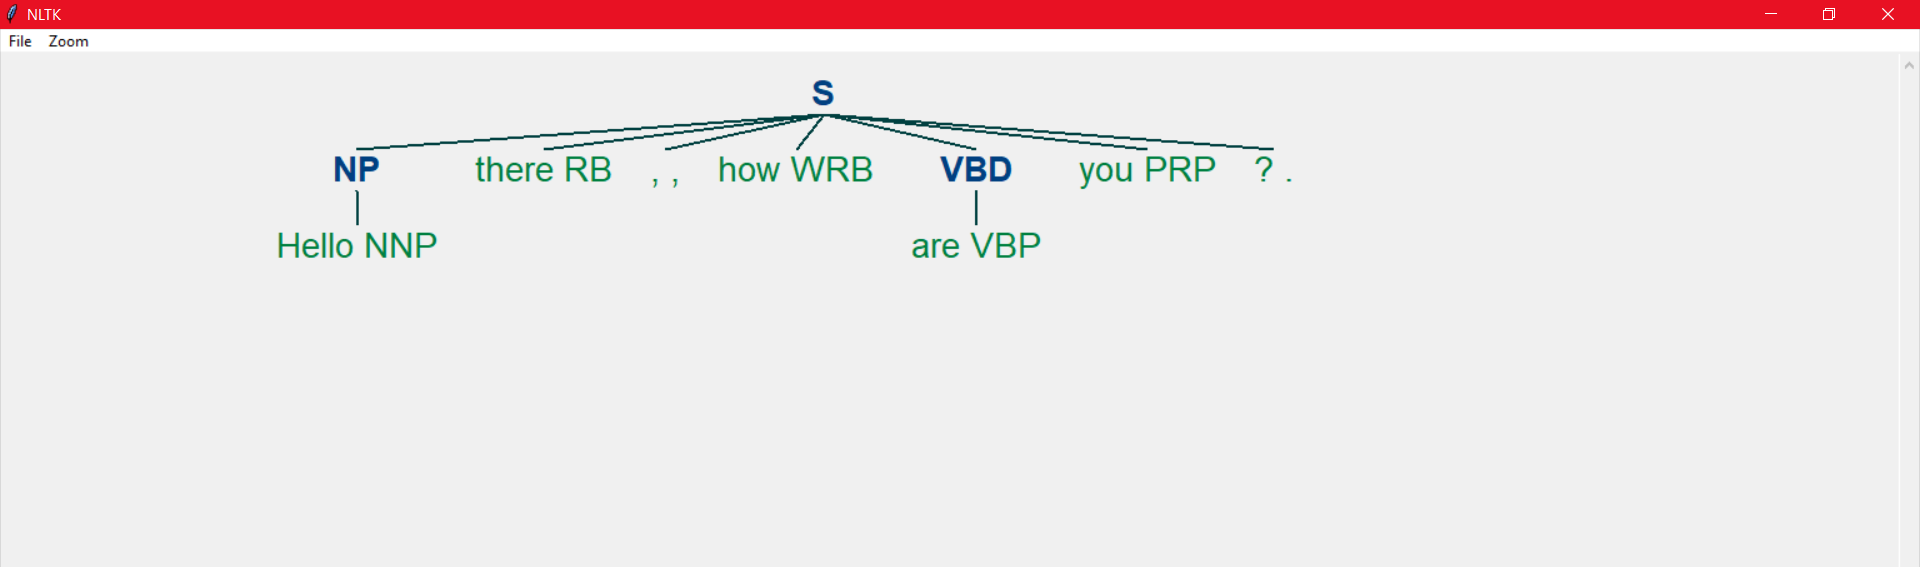

In [0]:
from IPython.display import Image
Image('/content/tree-structure.PNG')

## Q2
----------------------------------------------------------

In [0]:
from nltk.tokenize import word_tokenize 

res=[]

for i in data['Comment']:
    words= word_tokenize(i.strip('"'))
    words.append('\n')
    res.append(words)
  
print(res[0])

['Hello', 'there', ',', 'how', 'are', 'you', '?', 'Weather', 'is', 'awesome', '.', 'Its', 'raining', 'here', 'now', '.', '\n']


In [0]:
# storing the res
data=pd.DataFrame(res)
data.to_csv('data_out_Q2.csv',index=False)


## Q3

In [0]:
# POS-Tagging

# Reading the file
with open('NLPdataEx3&4-data_in.txt', 'r') as fp :
  content= fp.readlines()

content

['Hello there, how are you? Weather is awesome. Its raining here now.\n',
 'Hello Mr. Raja, how are you? Weather is awesome. Its raining here now.\n',
 'Hello Mr. Raja, how are you. Weather is bad. Its heavily raining here now.\n',
 'NLP is great technique. It is nice to learn this technique.\n',
 'AI is making difference in this world now.  It would be helpful for betterment of human life. We need to make advantage of that.\n']

In [0]:
from nltk.tokenize import word_tokenize as wt
from nltk import pos_tag as pos

from nltk.tree import Tree
from nltk.draw.tree import TreeView

from nltk import chunk

In [0]:
# we will consider that 3rd sentence to display its pos and tree diagram
# similary we can do for the others

# Tokenizer
words= word_tokenize(content[2])

# POS-TAGGING
res=pos(words)
print('-----------POS Tagging-------')
print(res)

pattern = """NP: {<DT>?<JJ>*<NN.?>}
                     VBD: {<VB.?>}
                     IN: {<IN>}"""

cp  =nltk.RegexpParser(pattern)

result = cp.parse(res)
print('\n------------- Tree Structure ----------\n')
print(result)
result.draw()

-----------POS Tagging-------
[('Hello', 'NNP'), ('Mr.', 'NNP'), ('Raja', 'NNP'), (',', ','), ('how', 'WRB'), ('are', 'VBP'), ('you', 'PRP'), ('.', '.'), ('Weather', 'CC'), ('is', 'VBZ'), ('bad', 'JJ'), ('.', '.'), ('Its', 'PRP$'), ('heavily', 'RB'), ('raining', 'VBG'), ('here', 'RB'), ('now', 'RB'), ('.', '.')]

------------- Tree Structure ----------

(S
  (NP Hello/NNP)
  (NP Mr./NNP)
  (NP Raja/NNP)
  ,/,
  how/WRB
  (VBD are/VBP)
  you/PRP
  ./.
  Weather/CC
  (VBD is/VBZ)
  bad/JJ
  ./.
  Its/PRP$
  heavily/RB
  (VBD raining/VBG)
  here/RB
  now/RB
  ./.)


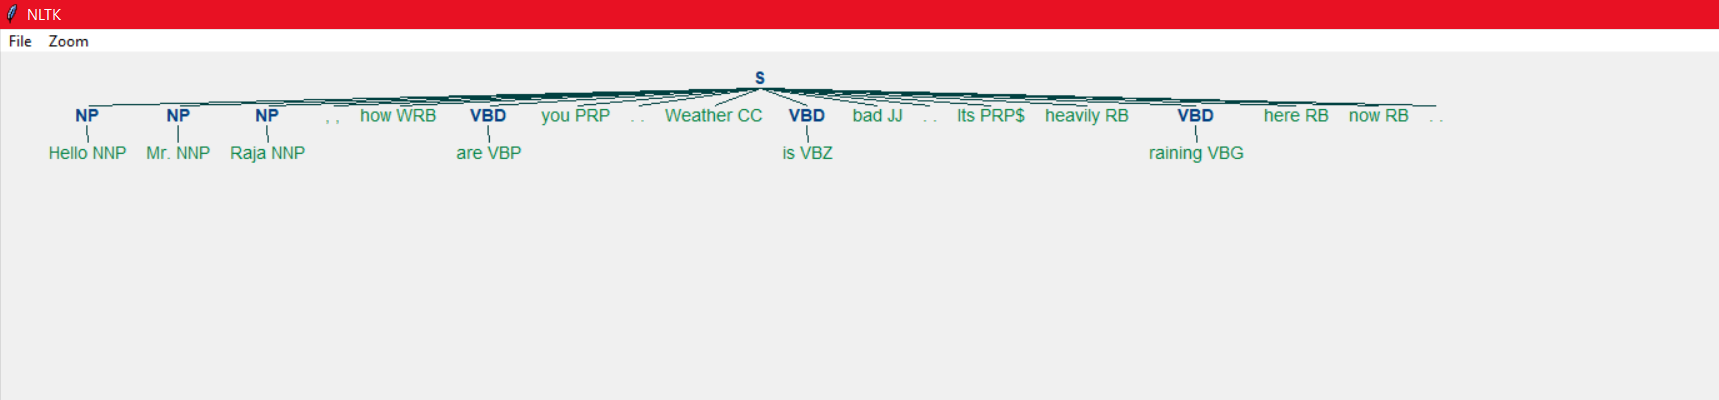

In [0]:
from IPython.display import Image
Image('/content/trre-structure.PNG')

##  Q4
------------------------------------------------------------------------------

In [0]:
# stop words, stemming , lemmatization

#reading from file
with open('NLPdataEx3&4-data_in.txt', 'r') as fp :
  content= fp.readlines()

content

['Hello there, how are you? Weather is awesome. Its raining here now.\n',
 'Hello Mr. Raja, how are you? Weather is awesome. Its raining here now.\n',
 'Hello Mr. Raja, how are you. Weather is bad. Its heavily raining here now.\n',
 'NLP is great technique. It is nice to learn this technique.\n',
 'AI is making difference in this world now.  It would be helpful for betterment of human life. We need to make advantage of that.\n']

In [0]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer

import string

porter=PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
en_stops = set(stopwords.words('english'))

In [0]:
for line in content :

  # Tokenizer
  words= word_tokenize(line)
  print(line)

  # removing the stopwords and punctuations
  new_words= [ w for w in words if w not in en_stops and w not in string.punctuation ]

  # Stemming
  stemmed_line= [porter.stem(w) for w in new_words]
  print(','.join(stemmed_line))

  # Lemmatization
  lemma_line= [wordnet_lemmatizer.lemmatize(w) for w in new_words]
  print(','.join(lemma_line))
  print('---------------------------------------------\n')

Hello there, how are you? Weather is awesome. Its raining here now.

hello,weather,awesom,it,rain
Hello,Weather,awesome,Its,raining
---------------------------------------------

Hello Mr. Raja, how are you? Weather is awesome. Its raining here now.

hello,mr.,raja,weather,awesom,it,rain
Hello,Mr.,Raja,Weather,awesome,Its,raining
---------------------------------------------

Hello Mr. Raja, how are you. Weather is bad. Its heavily raining here now.

hello,mr.,raja,weather,bad,it,heavili,rain
Hello,Mr.,Raja,Weather,bad,Its,heavily,raining
---------------------------------------------

NLP is great technique. It is nice to learn this technique.

nlp,great,techniqu,It,nice,learn,techniqu
NLP,great,technique,It,nice,learn,technique
---------------------------------------------

AI is making difference in this world now.  It would be helpful for betterment of human life. We need to make advantage of that.

AI,make,differ,world,It,would,help,better,human,life,We,need,make,advantag
AI,making

## Q5
-----------------------------------------------------------------------------

1. Create a small dictionary file with required set of words with weightage attached to it with positive and negative numbers. Create a python script that analyzes the given text file and classify it as negative or positive sentiment.

In [0]:
# List of positive and negative words

import ast

with open('NLPdataEx5dict.txt','r') as f:
  content=f.read()
  contents=content.split('\n')
  neg=contents[0]
  pos=contents[1]
  pos_string=  pos.replace('pos_words=[','').rstrip(']')
  neg_string=  neg.replace('neg_words=[','').rstrip(']')
  pos_word=[ str(word.strip('"')) for word in pos_string.split(',')]
  neg_word=[ str(word.strip('"')) for word in neg_string.split(',')]

In [0]:
# reading the text file 
# decide if it is a positive or negative sentiment

with open('NLPdataEx5data_senti_analyze.txt','r') as f:
  content= f.read()
  contents= content.split('\n')

contents

['Rose is beautiful.',
 'Place is nasty to stay.',
 'This is the beauty of this technique.',
 'Concept is explained beautifully in this book.',
 'He annoyed me.',
 'Its the supreme place to stay.',
 'I hate this place.',
 'Dont annoy the customer.',
 'He has given nasty comments about his stay.',
 'Dessert is awesome.',
 'Your gift is wonderful.']

In [0]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

wordnet_lemmatizer = WordNetLemmatizer()
en_stops = set(stopwords.words('english'))

In [0]:
# Sentiment Analysis

for line in contents :

  # WORD TOKENIZER
  words= word_tokenize(line)
  #print(words)

  # removing the stopwords
  words=[word for word in words if word not in en_stops and word not in string.punctuation]
  #print(words)

  
  # Lemmatizing
  content=[]
  for word in words : 
    content.append(wordnet_lemmatizer.lemmatize(word))
  #print(content)

  # Chekcing if it is a positive sentiment 
  flag=0
  for word in content :
    if word in pos_word:
      print(f'{line} ---  POSITIVE SENTIMENT')
      flag=1
      break
    elif word in neg_word:
      print(f'{line} ---  NEGATIVE SENTIMENT')
      flag=1
      break

  if flag ==0 :
    print(f'{line} ---  NEUTRAL SENTIMENT')  

Rose is beautiful. ---  POSITIVE SENTIMENT
Place is nasty to stay. ---  NEGATIVE SENTIMENT
This is the beauty of this technique. ---  POSITIVE SENTIMENT
Concept is explained beautifully in this book. ---  POSITIVE SENTIMENT
He annoyed me. ---  NEGATIVE SENTIMENT
Its the supreme place to stay. ---  POSITIVE SENTIMENT
I hate this place. ---  NEGATIVE SENTIMENT
Dont annoy the customer. ---  NEGATIVE SENTIMENT
He has given nasty comments about his stay. ---  NEGATIVE SENTIMENT
Dessert is awesome. ---  POSITIVE SENTIMENT
Your gift is wonderful. ---  POSITIVE SENTIMENT
